# Random Forest
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
# import some data to play with
data=pd.read_csv('Fraud_check.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
#Reorder the columns
data = data[["Taxable.Income", "Undergrad", "Marital.Status","City.Population","Work.Experience","Urban"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Taxable.Income   600 non-null    int64 
 1   Undergrad        600 non-null    object
 2   Marital.Status   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
#Rename the columns
data = data.rename(columns={"Taxable.Income":"Income", "Marital.Status":"M_Status","City.Population":"C_Population","Work.Experience":"W_Experience"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Income        600 non-null    int64 
 1   Undergrad     600 non-null    object
 2   M_Status      600 non-null    object
 3   C_Population  600 non-null    int64 
 4   W_Experience  600 non-null    int64 
 5   Urban         600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


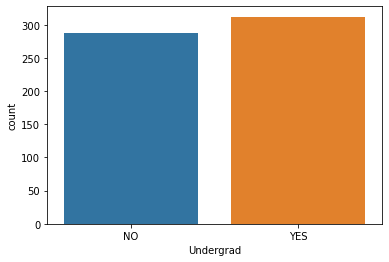

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


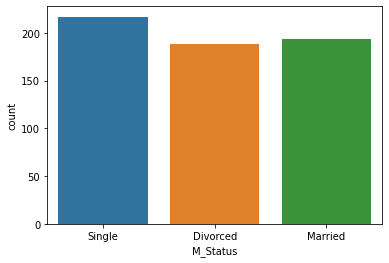

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


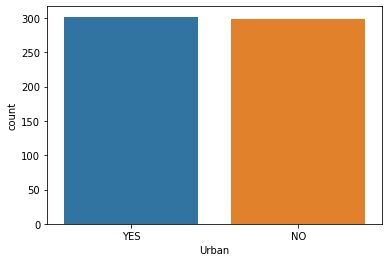

In [6]:
# checking count of categories for categorical columns colums
import seaborn as sns

sns.countplot(data['Undergrad'])
plt.show()

sns.countplot(data['M_Status'])
plt.show()

sns.countplot(data['Urban'])
plt.show()

In [7]:
data

,Income,Undergrad,M_Status,C_Population,W_Experience,Urban
0,68833,NO,Single,50047,10,YES
1,33700,YES,Divorced,134075,18,YES
2,36925,NO,Married,160205,30,YES
3,50190,YES,Single,193264,15,YES
4,81002,NO,Married,27533,28,NO
...,...,...,...,...,...,...
595,76340,YES,Divorced,39492,7,YES
596,69967,YES,Divorced,55369,2,YES
597,47334,NO,Divorced,154058,0,YES
598,98592,YES,Married,180083,17,NO


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


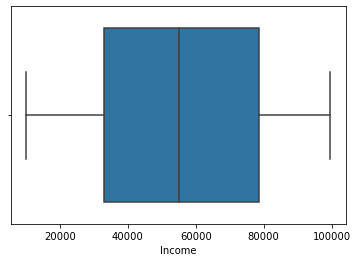

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


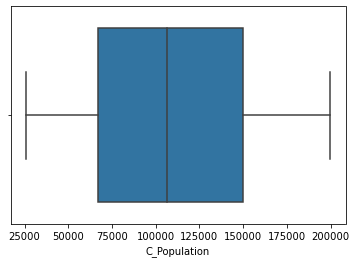

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


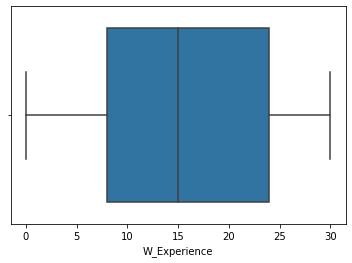

In [8]:
# Checking for outliers in numerical data
sns.boxplot(data['Income'])
plt.show()

sns.boxplot(data['C_Population'])
plt.show()

sns.boxplot(data['W_Experience'])
plt.show()

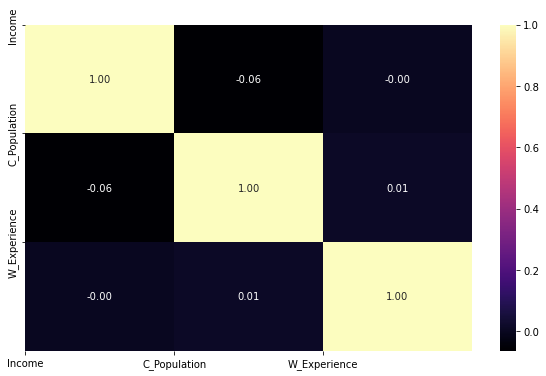

In [16]:
# Correlation analysis for data
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Income        600 non-null    int64 
 1   Undergrad     600 non-null    object
 2   M_Status      600 non-null    object
 3   C_Population  600 non-null    int64 
 4   W_Experience  600 non-null    int64 
 5   Urban         600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
data['Income'] = pd.cut(x = data['Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data

,Income,Undergrad,M_Status,C_Population,W_Experience,Urban
0,Good,NO,Single,50047,10,YES
1,Good,YES,Divorced,134075,18,YES
2,Good,NO,Married,160205,30,YES
3,Good,YES,Single,193264,15,YES
4,Good,NO,Married,27533,28,NO
...,...,...,...,...,...,...
595,Good,YES,Divorced,39492,7,YES
596,Good,YES,Divorced,55369,2,YES
597,Good,NO,Divorced,154058,0,YES
598,Good,YES,Married,180083,17,NO


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

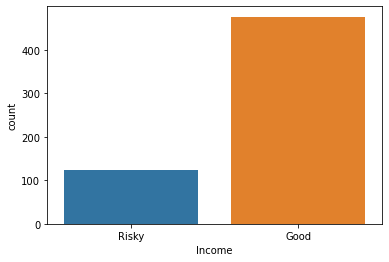

In [11]:
sns.countplot(data['Income'])

In [12]:
data['Income'].value_counts()

Good     476
Risky    124
Name: Income, dtype: int64

In [26]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['M_Status'] = label_encoder.fit_transform(data['M_Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['Income'] = label_encoder.fit_transform(data['Income'])
data

,Income,Undergrad,M_Status,C_Population,W_Experience,Urban
0,0,0,2,50047,10,1
1,0,1,0,134075,18,1
2,0,0,1,160205,30,1
3,0,1,2,193264,15,1
4,0,0,1,27533,28,0
...,...,...,...,...,...,...
595,0,1,0,39492,7,1
596,0,1,0,55369,2,1
597,0,0,0,154058,0,1
598,0,1,1,180083,17,0


In [14]:
# dropping column taxable_income
data1 = data.drop('Income', axis = 1)
data1

,Undergrad,M_Status,C_Population,W_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


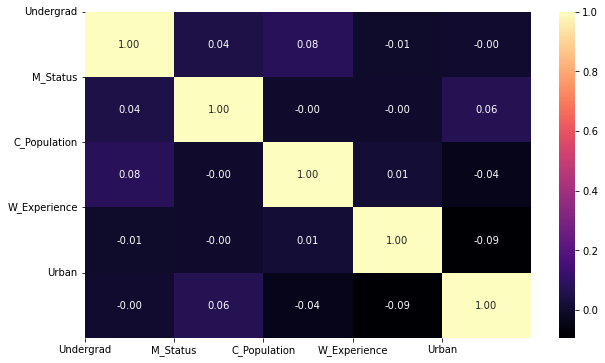

In [15]:
# Correlation analysis for data11
corr = data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [17]:
# Dividing data into independent variables and dependent variable
X = data.drop('Income', axis = 1)
Y = data['Income']

In [55]:
X

,Undergrad,M_Status,C_Population,W_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [18]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Income, Length: 600, dtype: int32

In [57]:
data['Income'].unique()

array([0, 1])

In [59]:
data.Income.value_counts()

0    476
1    124
Name: Income, dtype: int64

In [60]:
colnames = list(data.columns)
colnames

['Income', 'Undergrad', 'M_Status', 'C_Population', 'W_Experience', 'Urban']

In [22]:
# Random Forest Classification

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7466666666666667
